In [1]:
import numpy as np  # linear algebra
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/market.csv")

In [3]:
df.shape

(1000, 17)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<b>There are no missing value and the data set is clean so we will continue with data visualization.</b>

## <b>Visualization</b>

## Gender column

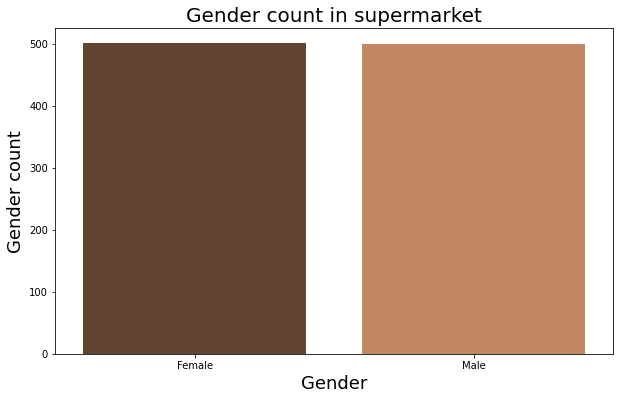

In [8]:
plt.figure(figsize=(10,6))
sns.countplot("Gender", data=df , palette = "copper")
plt.xlabel("Gender",fontsize=18)
plt.ylabel("Gender count", fontsize = 18)
plt.title("Gender count in supermarket", fontsize = 20)
plt.show()

<p><b>Here we can see that the number of males and females entering the store is almost equal. But the visualization looks suspicious. Let’s check numeric data.</b></p>

In [9]:
df.groupby(["Gender"]). agg({"Total":"sum"})

,Total
Gender,
Female,167882.925
Male,155083.824


## Customer type

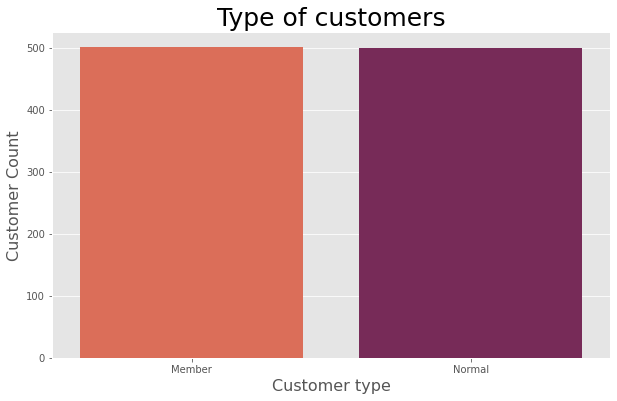

In [10]:
plt.figure(figsize= (10,6))
plt.style.use("ggplot")
sns.countplot(x = "Customer type", data = df, palette = "rocket_r")
plt.title("Type of customers", fontsize = 25)
plt.xlabel("Customer type", fontsize = 16)
plt.ylabel("Customer Count", fontsize = 16)
plt.show()

<p><b>The visualization looks suspicious let’s check numeric data.</b></p>

In [11]:
df.groupby(["Customer type"]). agg({"Total":"sum"})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<b>Now let’s check for different branch.</b>

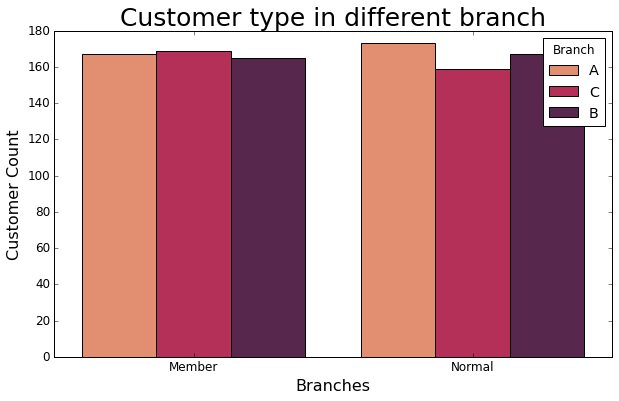

In [12]:
plt.figure(figsize=(10,6))
plt.style.use("classic")
sns.countplot(x = "Customer type", hue = "Branch", data = df, palette= "rocket_r")
plt.title("Customer type in different branch", fontsize = 25)
plt.xlabel("Branches", fontsize = 16)
plt.ylabel("Customer Count", fontsize = 16)
plt.show()

## <b>Checking the different payment methods used.</b>

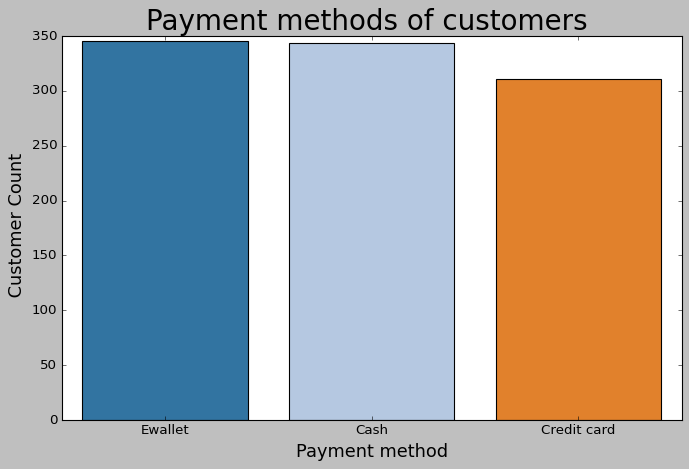

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Payment", data = df, palette = "tab20")
plt.title("Payment methods of customers ", fontsize= 25)
plt.xlabel("Payment method", fontsize = 16)
plt.ylabel(" Customer Count", fontsize = 16)
plt.show()

## <b>Payment method distribution in all branches</b>

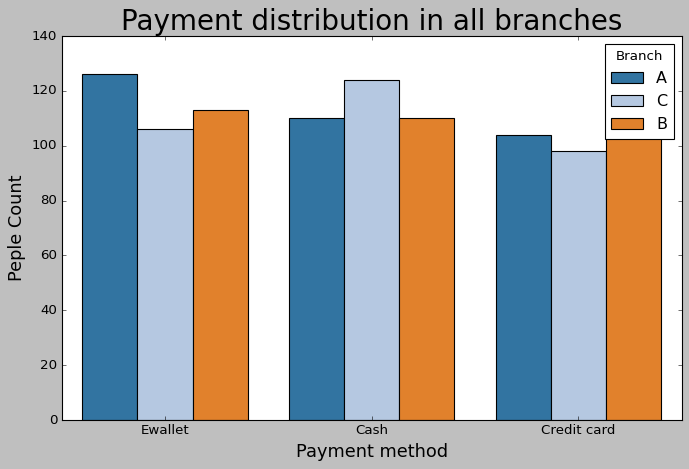

In [14]:
plt.figure(figsize = (10,6))
plt.style.use("classic")
sns.countplot(x="Payment", hue = "Branch", data = df, palette= "tab20")
plt.title("Payment distribution in all branches", fontsize= 25)
plt.xlabel("Payment method", fontsize = 16)
plt.ylabel("Peple Count", fontsize = 16)
plt.show()

## <b>Now let’s see the rating distribution in 3 branches</b>

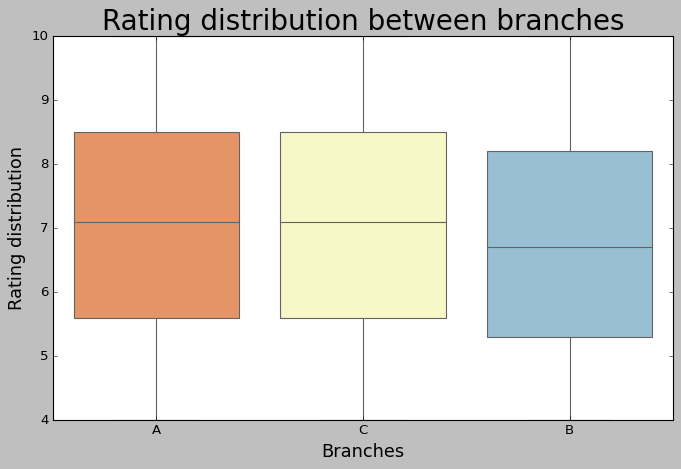

In [15]:
plt.figure(figsize=(10,6)) 
sns.boxplot(x="Branch", y = "Rating" ,data =df, palette= "RdYlBu")
plt.title("Rating distribution between branches", fontsize = 25)
plt.xlabel("Branches", fontsize = 16)
plt.ylabel("Rating distribution", fontsize = 16)
plt.show()

<p><b>We can see that the average rating of branch A and C is more than seven and branch B is less than 7.</b></p>

## <b>Max sales time</b>

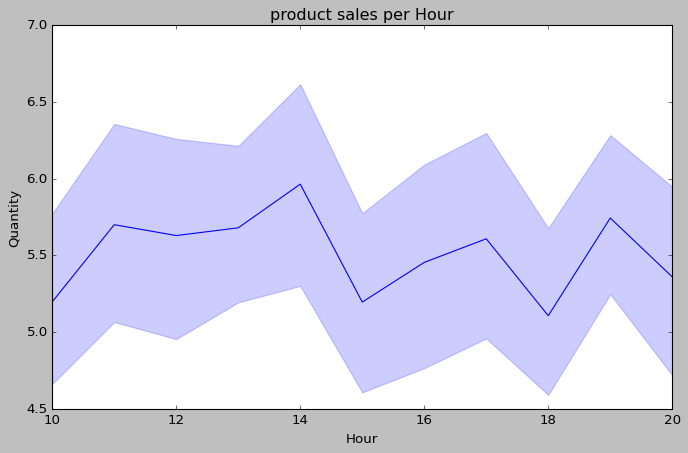

In [16]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour
plt.figure(figsize=(10,6))
plt.style.use("classic")
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = df).set_title("product sales per Hour")
plt.show()

## <b>Rating vs sales</b>

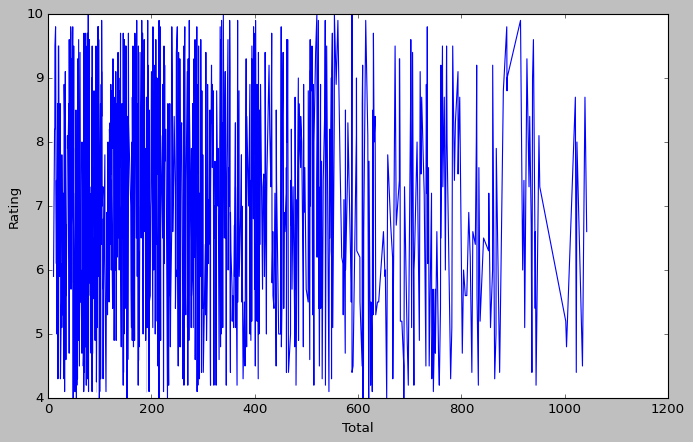

In [17]:
plt.figure(figsize=(10,6))
plt.style.use("classic")
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=df)
plt.show()

## <b>Using boxen plot</b>

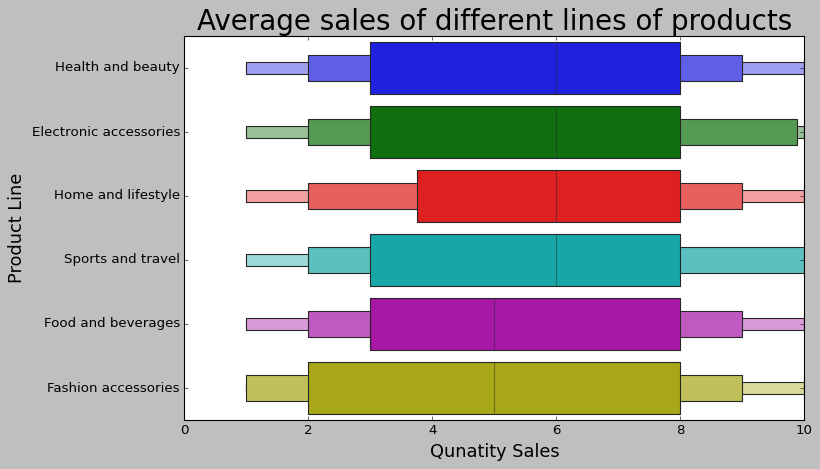

In [18]:
plt.figure(figsize=(10,6))
plt.style.use("classic")
sns.boxenplot(x = "Quantity", y = "Product line", data = df)
plt.title("Average sales of different lines of products", fontsize = 25)
plt.xlabel("Qunatity Sales",fontsize = 16)
plt.ylabel("Product Line", fontsize = 16)
plt.show()

<p><b>Here we can see that the average sales of different lines of products. Health and beauty making the highest sales whereas Fashon accessories making the lowest sales.</b></p>

## <b>Let’s see the sales count of these products.</b>

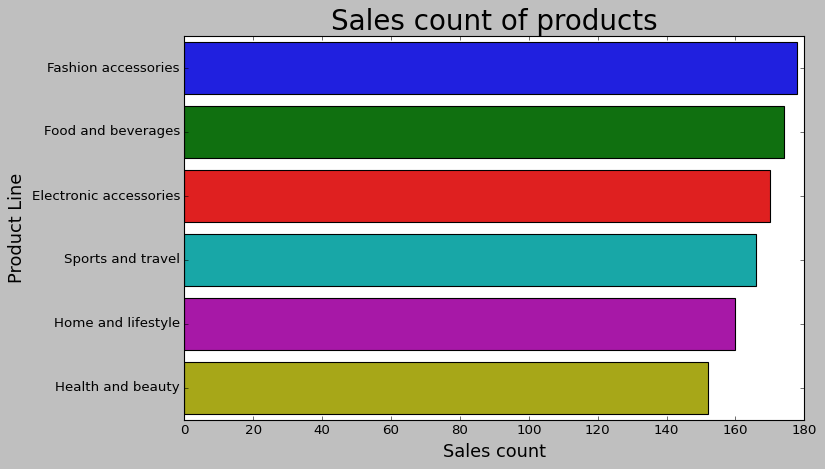

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y="Product line", data=df, order = df["Product line"].value_counts().index)
plt.title("Sales count of products", fontsize = 25)
plt.xlabel("Sales count", fontsize = 16)
plt.ylabel("Product Line", fontsize = 16)
plt.show()

<b>We can see the top sold products form the above figure.</b>

## <b>Total sales of product using boxenplot</b>

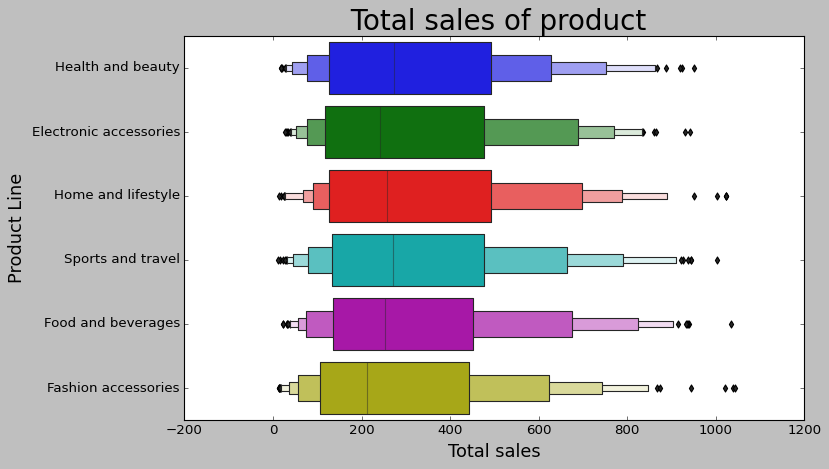

In [20]:
plt.figure(figsize=(10,6))
plt.style.use("classic")
sns.boxenplot(y= "Product line", x= "Total", data = df)
plt.title(" Total sales of product", fontsize = 25)
plt.xlabel("Total sales", fontsize = 16)
plt.ylabel("Product Line", fontsize = 16)
plt.show()

## <b>Let’s see average ratings of products.</b>

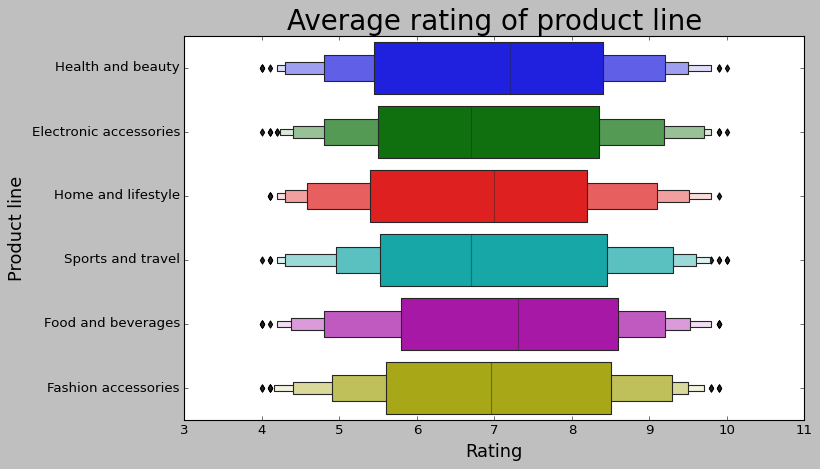

In [21]:
plt.figure(figsize = (10,6))
plt.style.use("classic")
sns.boxenplot(y = "Product line", x = "Rating", data = df)
plt.title("Average rating of product line", fontsize = 25)
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Product line", fontsize = 16)
plt.show()

## <b>Product sales on the basis of gender</b>

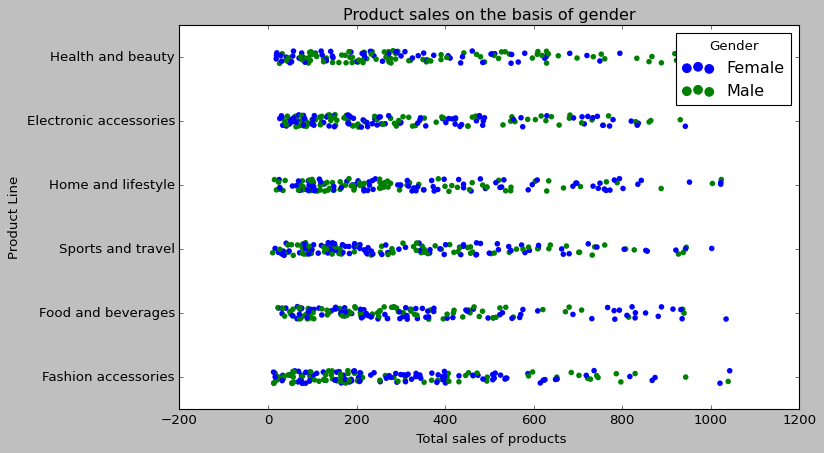

In [22]:
plt.figure(figsize = (10,6))
sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = df)
plt.title("Product sales on the basis of gender")
plt.xlabel(" Total sales of products")
plt.ylabel("Product Line")
plt.show()